### Title: "MAL 02"

| Gruppe 30 |
| --------- |

| Navn                    | Studienummer |
| ----------------------- | ------------ |
| Lasse Borring Petersen  | 202208165    |
| Benjamin Harboe Strunge | 202209864    |
| Esben Inglev            | 202210050    |
| Asbjørn Vad             | 202208512    |


In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# L3: Supergruppe diskussion

#### Resume: Look at the Big Picture

This chapter is about everything you should do before you start working on the problem itself. You should start off by considering what kind of data you have, and what you want to find out from this data. Is it about categorizing the data? Or do you want your model to be able to predict an exact number instead. This all depends on what the model will be used for, and how it will fit into the overall system. Thereby this also affects the choice of machine learning algorithm that will be used, which is also important to get right early on, so you don't waste time working on something that is not needed.

You should also consider what the current solution to the problem looks like, if there is one. This can give you and indication of how good your model needs to be, to be effective to the users. By understanding the current solution to the problem, it is easier to get to work on a new, better one.

When all this is considered, you are ready to start designing the system. Now is the time to consider what kind of training supervision the model will be using. This can often be found out by understanding the problem, underlining the importance of the steps described above. Here you also select what kind of performance measure the model will be using. The book here describes a few possible options like RMSE and MAE, how they differ, and when they should each be used.

Lastly, the book describes the importance of checking the assumptions that have been made to far, and that they are still correct. This can help catch errors earlier on, making the easier to deal with.

#### Resume: Get the Data

This chapter starts off with quite a long section about Google Colab, and how jupyter notebooks work, which we will skip here.

Then we get to looking at the data structure, where we see the parameters, and the median house price. It is then described what kind of data we are looking at for each attribute, and how we can view it to understand it easier. It also explains the data snooping bias, and why it is important to make some decisions before looking at the data, and some after.

After that it is described how and why we extract a test set, and how we make sure we dont mix up our test and training sets, across different runs. It also talks about stratas, which is a way of categorizing your data, and making sure your model has the correct amount of each category in each set.

The chapter concludes by underlining the importance of test set generation, as this is the data that will define the model and its usefulness.

#### Resume: Explore and Visualize the Data to Gain Insights,

This chapter is about going more in depth about the data, exploring it and learning about its correlations.

It starts off again making sure that you only work on the training data, and that you always have a copy of it, just in case.

Then, because we are working with geographic data (Californian housing prices), we can viualize it with the longitude and latitude, clearly showing the state in the diagram. Then a few parameters are changed, to better the visualization, which ends up showing the most/least expensive areas, as well as the population density in these areas. This helps us identify the more expensive areas, which is obviously in the larger cities in the state.

After that we look into the standard correlation coefficient between every pair of attributes. This describes the linear correlation between each attribute, going from -1, indicating a negative linear relationship (One goes up when the other goes down), to 1, indicating a positive linear relationship. here we see a quite strong correlation between the house value and the median income of said house, which is not surprising. This is then looked further into, plotting them against eachother. Here we can visually see the correlation between them, as well as the data cap on the house value of 500.000$.

Lastly it talks about attribute combinations, where you can combine some attributes that are not that useful on their own (total number of rooms in district & number of households in district). Therefore 3 new attributes are created: Rooms per house, bedrooms ratio, and people per house. These are some attribues that might be more useful, as it is also seen when the book shows the correlation matrix again. Here we see that the bedrooms ratio has a negative correlation with the median house value, indicating that more expensive houses have more rooms in them that are not bedrooms.

It concludes by mentioning that this is of course an iterative proces, where you can analyze your prototypes output, gain more insight into the data, and explore it further.

#### Resume: Prepare the Data for Machine Learning Algorithms

Of all the things you do when preparing data it is important to make this into single reusable functions, which can be used for retrainging the same model or new models in the future

The first step is to clean your data. If an attribute has a lot of missing data you can either, remove the attribute or set the missing values to some value (zero, mean, median, etc.)
Then there is the problem with text based attributed, since models usually like to train on numerical data. But if there is a set amount of text options, we're in luck because then they can be numerized. A initiate attempt at doing this, would be to make a sort of enum out of the text options. But this bears a problem, as most ML algorithms usually make the assumption that when numbers are close they resemble eachouter, which doesnt necessarly have to be the case with text options. Therefore the prefered method is to add a binary attribute for each text option, which is either 0 or 1.

There is also the problem ff there is a big difference in the size of the numbers between attributes it can cause harm to trainign proccess of a model. E.g. pretty much all models would tend to ignore an attribute whose numbers range from 0-15 if another attribute range from 6-39.320. If this is the cause, it is a good idea to scale the values. One way to do this is with min-max scaling also known normalization where all values are scaled to be between 0-1. Another is standardization where all values are subtracted by the mean and divides it bny the standard deviation.

Standardization handles outliers better than min-max scaling. To understand why its best to understand with an example. if the average value is 10, but there is an outlier which is 100, the 100 will unfairly squash all of the otherwise average values into the low range of the 0-1 interval (instead of having them be 0.5 as "expected"). Standardization is better at solving this "squashing"-problem. But if there a many outliers in one end (aka. a heavy tail), standardization will also fail. Here other methods are needed which differs from dataset to dataset.

The chapther also touches on the subject of transformers which are tools used to do all of this data prepping. Another example given by the book is a transformer which is klustering to find clusters in the dataset and then creates new features for the ML algorithm to learn from

#### Resume: Select and Train a Model

The chapter covers 3 different models. The first is the classis linear model, which it trains on the house data. This gives out a poor perfomance with an RMSE of about 67000 thousand. Contextually this is a large number as house prices average on 120.000 - 265.000 dollars.
Second model is the DecisionTreeRegressor, which has an RMSE of 0. It compltely overfits. Which means it learns the training data too good, and therefore perfoms badly on new test sets. This overfitting is found by using Scikit K-fold cross validation feature, which splits up datasets into n non-overlapping groups and then trains the model n times with a new group being the test set each time.
Last model is the RandomForestRegressor, which perfoms better with a RMSE of 47.000 on a test set and 17.500 on the training set. So still som overfitting but still better.
The chapther doesnt dive too deep into how the models work, but simply focus on the fact, that there are multiple models to choose from with different benefits.

#### Resume: Fine-Tune Your Model

This chapter covers methods to fine tune your choosen model

Grid search:

- Chose hyperparameters to finetune. Can be wherever in the pipeline/trainign process. Specify parameter and training values. if two parameters are chosen each which 3 test values 3 x 3 = 9 combinations are tested. Thereby the name "grid search"

Randomized search:

- Like grid search, but instead of searching all combinations, you set a max amount of iterations and the model simply pick out random combination. Apparently surprisingly good

Analyzing:

- Not all analyzing can be done by the computer. You, the programmer can also do a lot of manual fiddling. When the best model is found , if the reative importance of attributes can be found, its a good idea to remove parameters of low importance. Its good to clean outliers, look at the erros and try to figure out why it fails. Make subsets of your validation data to make sure it doesnt only work good on average. In the example of house pricing they make subsets of rural, urban, rich, poor, nothern, southern, minority or not.

Final testing:

- 95 confidence interval is just a range, where you say "I am 95 confident that the real average perfomance of my model is between these two numbers". Its really good to have, because maybe your final test was either really luck or unlucky. Also usefull to test if your fine tuned model is actually better than your last one, if the fine tuned models scores are outside of the 95 confidence interval of the old model.

#### Resume: Launch, Monitor, and Maintain Your System

Model can be download with
joblib.dump(final_model, "my_california_housing_model.pkl")
Book recommends to make the model into its own web service aka. microservice, which you backend then can query to get predictions on data.
It recommends Googles Vertex AI, which is a cloud service, which can automatically handle scaling and load balancing if your ML service gets a lot of traffic

it highlights the importance of maintaining your model so it doesnt succumb to e.g. "model rot", where a model is trained on last year data, so it is thereby outdated in its prediction.
It recommends to put in place a monitoring systen (with or without humans), and this whole mainting/monitoring process should be automated as much as possible as its usually a very big task - even bigger than training the model in the first place. 3 pointers are:

1. Collect fresh data regularly and label it
2. Write script to auto train train model an fine tune hyperparameters
3. Write script which compares new model with old and automatically deploys new model if performance hasnt decreased


# L4: Dataanalyse til O4


### Problem Statement
Pokémon have existed in many shapes and colors, both in design and form. They range from black to pink, from gigantic to tiny, from digital bits in your handheld console to your favorite plushie in your bed. Among the Pokémon population, there is also a clear distinction between the normal pokémons and the so-called "legendary" pokémons! The legendary pokémons are typically larger, stronger, rarer, and overall (subjectivly?) cooler. As humans, we can often distinguish a legendary pokémon from a normal one. But what are the characteristics that create this distinction? And more importantly (for the relevance of this course), are these characteristics we can quantify? In this O4 assignment, we will therefore see if it is possible to train an algorithm to be able to precisely and accurately predict/"figure out" whether a given Pokémon is legendary or not.

Since Pokémon are fundamentally a man-made product and not governed by any laws of nature, it is not expected that this algorithm will (or can) achieve a perfect score. Nevertheless, it is the group's hypothesis that the fundamental design rules and subconscious decisions GAME FREAK [*] follows will be enough to see patterns and achieve a satisfactory result!

[*]: The creators and designers for Pokémons

### Dataset

To begin with, the dataset is limited to only data about pokémons from the main series of Pokémon games.

All data about the pokémons and their different forms and variations is retrieved via the unofficial PokéApi [Link]. This is done via fetch_all_pokemon_data.py. The resulting JSON file takes 1-3 minutes to produce and spans an impressive 8.5 million lines. To make the data easier to work with a secondary script is made - preprocess_data.py - which creates the final data file to be worked with. It is in this preprocessing that pokémons are labeled with is_legendary, which will naturally become the dataset's resulting matrix.

This file contains 1302 pokémons. This includes all pokémons and their different variations. Based on knowledge of the games, features are selected from the raw data that may have an impact on a pokémon's legendary status.

- Id (the pokémon's id within the game)
- Name
- Height
- Weight
- The 6 stats (hp, attack, defense, special attack, special defense, speed)
- Moves_count (the number of moves a pokémon can learn. Was derived during preprocessing)
- Held_items_count (the number of different items a wild pokémon can hold. Was derived during preprocessing)
- Base_experience (the experience points the player recieves upon defeating the pokémon)
- Type 1 (a pokémon can have 1 or more types, e.g., ground, water, flying, and others)
- Type 2
- Is_legendary (manually labeled during preprocessing) (The boolean value to predict)

The group hypothises that height and weight will have a significant impact, since legendaries tend to be big and strong.

[Link]: https://pokeapi.co/

With these 15 features and 1302 pokemon we would get a feature matrix of shape (1302, 15) and a result matrix of shape (1302, ). The first thing we do is exclude the features type 1 and type 2, since they would be too hard to quantize. We also exclude the name and id feature, as these probably dont have any real impact. They're still in the preprocessed_pokemon_data.json as they're nice to have to identify pokemons. This leaves us with the inital feature matrix of shape (1302, 11)

In [2]:
# Initial import
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import r_regression

In [3]:
POKEMON_FILE_NAME = 'preprocessed_pokemon_data.json'
with open(POKEMON_FILE_NAME, 'r', encoding='utf-8') as f:
            pokemons = json.load(f)

print(f"Loaded {len(pokemons)} pokemons from {POKEMON_FILE_NAME}")

feature_keys = ['height', 'weight', 'hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed', 'moves_count', 'held_items_count', 'base_experience']
x = [[pokemon[key] for key in feature_keys] for pokemon in pokemons]
y_is_legendary = [pokemon['is_legendary'] for pokemon in pokemons]

X = np.array(x)
y = np.array(y_is_legendary)
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Loaded 1302 pokemons from preprocessed_pokemon_data.json
Feature matrix shape: (1302, 11)
Target vector shape: (1302,)


Already, we can look at how the features correlates and which statistical values they poses:

In [4]:
np.set_printoptions(suppress=True, precision=2)

# Average
x_mean = X.mean(axis=0).round(1)
print("mean:\t", x_mean, "\n")

# Median
x_median = np.median(X, axis=0)
print("median:\t", x_median, "\n")

# standard deviation
x_std = X.std(axis=0).round(1)
print("std:\t", x_std, "\n")

# Pearsons R
r_regressions = r_regression(X, y).round(2)
print("Pearsons R, correlation with is_legendary:")
for feature, r in zip(feature_keys, r_regressions):
    print(f"{feature}: {r}")

mean:	 [ 20.5 980.9  71.3  81.6  75.2  73.7  73.   71.2  73.4   0.4 161.9] 

median:	 [ 10.  315.5  70.   80.   70.   65.   70.   70.   74.    0.  165. ] 

std:	 [  54.2 1971.9   26.9   31.7   30.5   32.5   27.3   30.3   27.4    0.7
   82.5] 

Pearsons R, correlation with is_legendary:
height: 0.08
weight: 0.19
hp: 0.3
attack: 0.3
defense: 0.27
special-attack: 0.36
special-defense: 0.37
speed: 0.33
moves_count: 0.08
held_items_count: -0.19
base_experience: 0.5


It seems the groups original hypothesis of water and weight was not correct. The biggest correlation with the legendarys tatus is by far the base_experience feature. Upon further fought this fits well with the narrative, that a game developer wants to be extra rewarding when a player overcomes an unsual challange. The stats of the pokémon also have a relatively big postive correlation with the legendary status. 

The standard deviation of weight is a lot bigger than that of everything else. 1972 compared to and otherwise average standard deviation of about 40. This will be taken into account in a future chapther (optimization and improvements)

We'll also take a look at the histograms of the features, to see if anything odd or unexpected pops up:

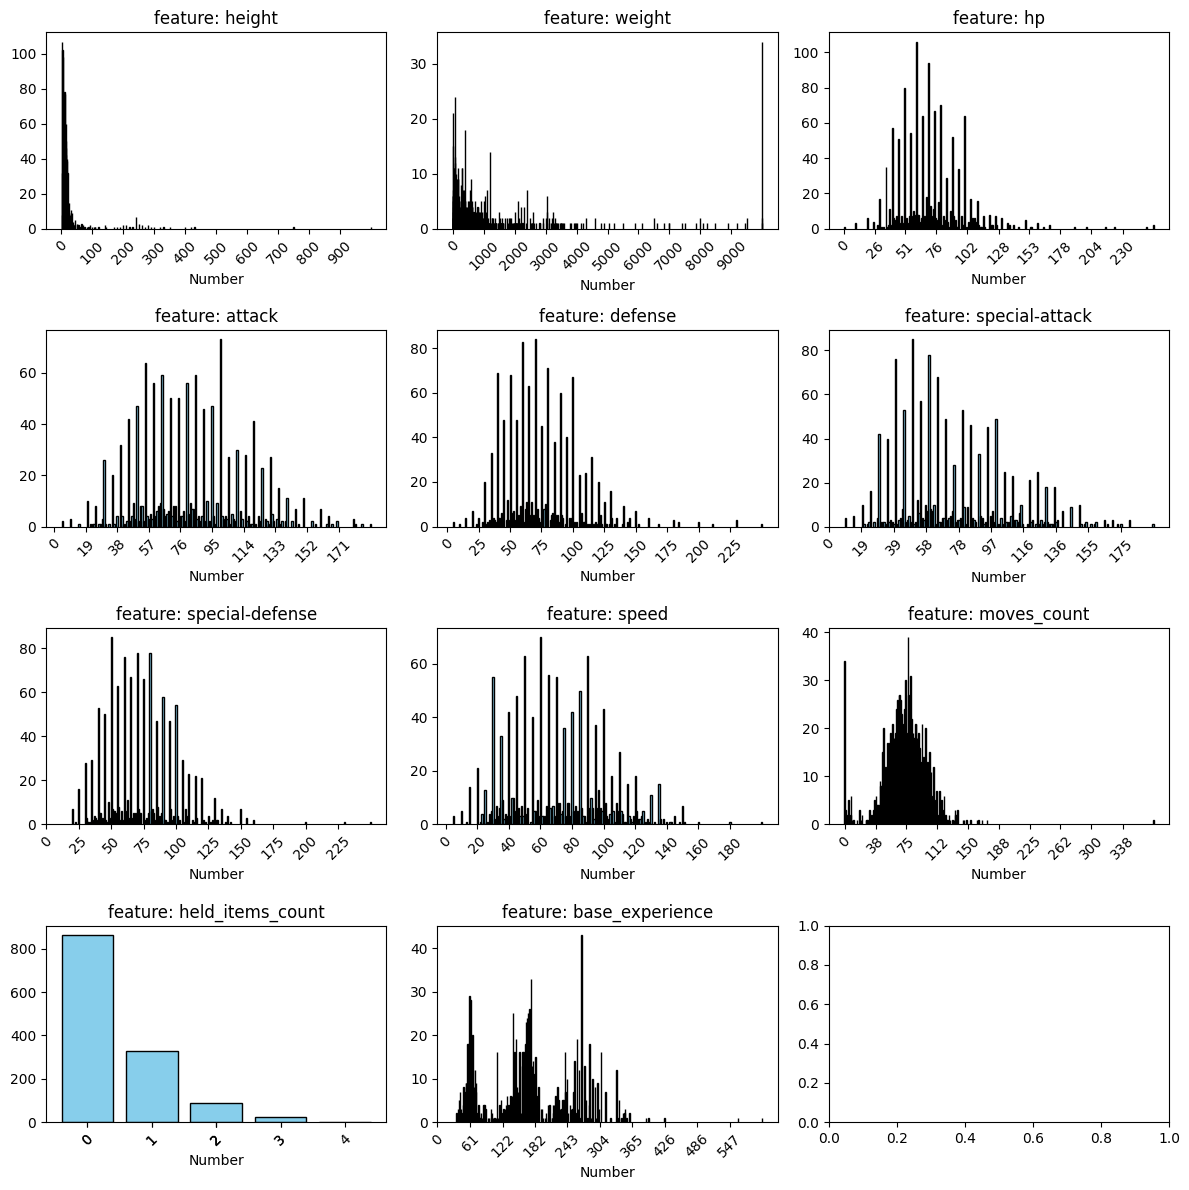

In [5]:
num_columns = X.shape[1]

fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for i in range(num_columns):
    row_idx = i // 3
    col_idx = i % 3

    column = X[:, i]
    
    unique_numbers, counts = np.unique(column, return_counts=True)
    
    ax = axes[row_idx, col_idx]
    
    ax.bar(unique_numbers, counts, color='skyblue', edgecolor='black')

    ax.set_title(f'feature: {feature_keys[i]}')
    ax.set_xlabel('Number')
    ax.tick_params(axis='x', rotation=45)
    max_number = unique_numbers.max()
    ax.set_xticks(np.arange(0, max_number, max_number / 10).round(0))

plt.tight_layout()

# 5. Display the plot
plt.show()

A lot of the graphs, when visually inspected, shows a lot of nice looking bellcurves - some more skewed than others. This confirms the groups suspecion, that the designers at GAME FREAKS like all other humans creates guassian distributed results. I does not prove any correlation between the features and  the legendary status, but its good to know that choosen values aren't just noise values.

There are a few things to addres tough. First of the keen reader will quickly notice, that the histograms of the graphs are overall bellcurved but with spikes at certain values. This is explained by the tendency to make values a multiplier of 5 or 10.
The secondary odd thing is the amount of REALLY heavy pokémons. Actually the biggest occurency of the weight feature is the max weight of 10000 kg. These values comes from the 32 gigantamax pokemon! A variant of normal pokemons, which has been boosted by supernatural powers to an enormous size [Link]. The 3.rd and last odd thing we'll touch upon is the seemingly lack of a gaussian curve in the base_experience feature. Instead of having one simple curve, an could look like there is 3 distinct groups. Why these occur is an exercise left to the reader :) (Probably just arbitary design chooses)

[Link]: https://bulbapedia.bulbagarden.net/wiki/Gigantamax

The final thing we'll look at is the distribution of legendary and non-legendary pokémon:

In [6]:
print("Amount of legendary pokemon:", y.sum())
print("Amount of non-legendary pokemon:", len(y) - y.sum())
print("Percentage of legendary pokemon: {:.2f}%".format((y.sum() / len(y)) * 100))

Amount of legendary pokemon: 131
Amount of non-legendary pokemon: 1171
Percentage of legendary pokemon: 10.06%


The percentage of legendary pokémon is only 10%! This is a big overrepresentation of non-legendary pokémon which must be taken into consideration.

# L4: Pipelines

### Setup code

To load the data from the pickle library


In [7]:
%matplotlib inline

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


### Revisiting the problem with the MLP

We see that using the MLP fro the data in Qd from `intro.ipynb`
gives a negative $R^2$ score, which is the background for our problem.


The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-37153.25


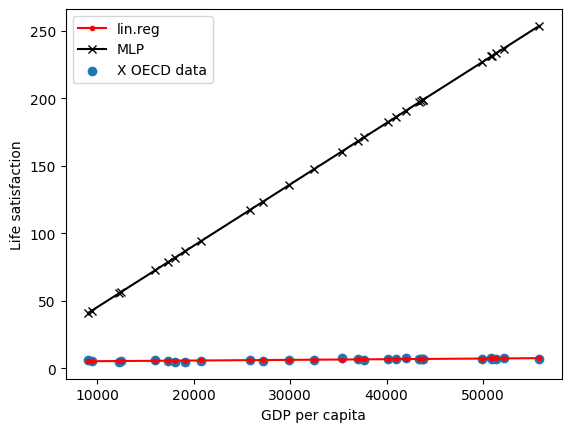


OK


In [8]:
# Setup the MLP and lin. regression again..

def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
plt.show()
print("\nOK")

## Qa) Create a Min/max scaler for the MLP

To scale the values, we take the min and max of X and y, and the range between them. Then we subtract the min from X and y respectively, and divide the result by the range. This gives us the scaled data, that we can then run the MLP on.


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.71


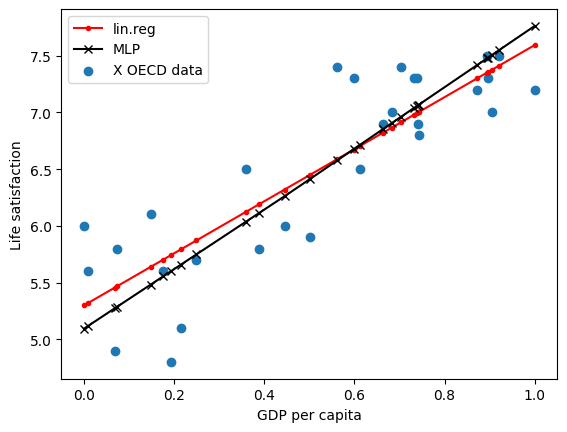

In [9]:
X_min = np.min(X)
X_max = np.max(X)
s = X_max - X_min

X_scaled = (X-X_min)/s

mlp.fit(X_scaled, y)
linreg.fit(X_scaled, y)

PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")
plt.show()



#### Sources

Lesson 4, slide 18


## Qb) Scikit-learn Pipelines

Instead of doing the scaling manually, we use the `sklearn.preprocessing.MinMaxScaler`, and create a pipeline to do it for us. This simplifies the proces a lot, since the scaling is just done automatically in the pipeline.

However, we do find that the MLP does not perform any better than the LinReg, at least not with MinMaxScaling.


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.72


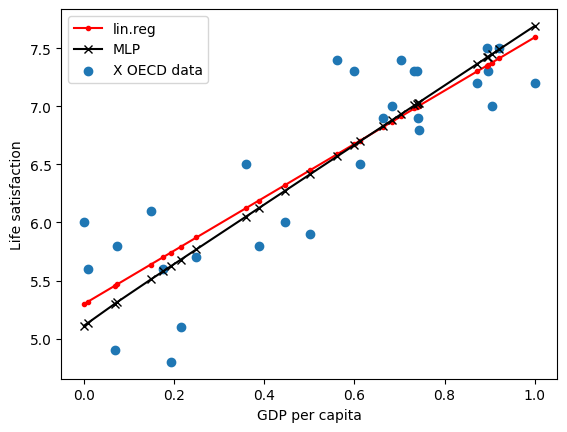

With pipelines
Lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.72


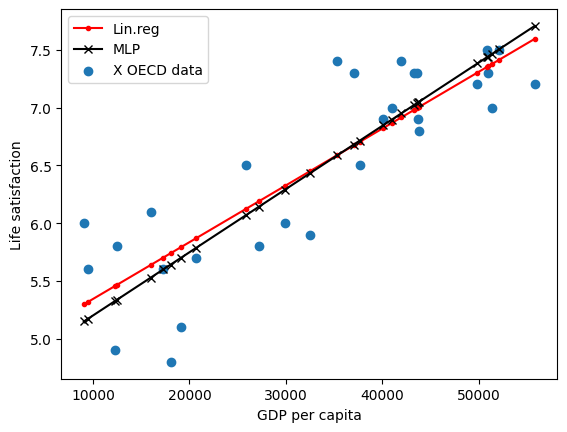

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
M_scaled = scaler.transform(M)


mlp.fit(X_scaled, y)
linreg.fit(X_scaled, y)

PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")
plt.show()

# Pipeline
print("With pipelines")

scaledMLPPipe = Pipeline (
  [
    ('scaler', MinMaxScaler()),
    ('mlp', mlp)
  ]
)

scaledLinRegPipe = Pipeline (
  [
    ('scaler', MinMaxScaler()),
    ('linreg', linreg)
  ]
)

scaledMLPPipe.fit(X,y)
scaledLinRegPipe.fit(X,y)

PlotModels(scaledLinRegPipe, scaledMLPPipe, X, y, "Lin.reg", "MLP")
plt.show()




#### Sources

Lesson 4, slide 19


## Qc) Outliers and the Min-max scaler vs. the Standard Scaler

#### MinMaxProblem

The problem with the MinMaxScaler is that a single outlier has a major affect on the rest of the dataset.

Imagine we have these five values: [2, 4, 3, 6, 21]

21 is a clear outlier and it shrink the other values, making it harder for the model to destinguish between the meaningful datapoints:

MinMaxScaled =

(2 - 2) / 19 = 0.000

(4 - 2) / 19 = 0.105

(3 - 2) / 19 = 0.053

(6 - 2) / 19 = 0.211

(21 - 2) / 19 = 1.000

#### StandardScaler

The standard scaler converts the values into a mean(likely 0) and then a variance/standard deviation.

The standard scalers strength is not in that the relation between the meaningful datapoints and the outlier is changed (because that stays the same in the original data, and both scalers), but in that the numerical difference between the meaningful datapoints is kept "alive", and that the model will have an easier time to learn from this input

It should be used when outliers are present, but cant or wont be removed from the set.

As seen on the plot, the MLP is no longer linear and the score has increased slightly.


Lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.77


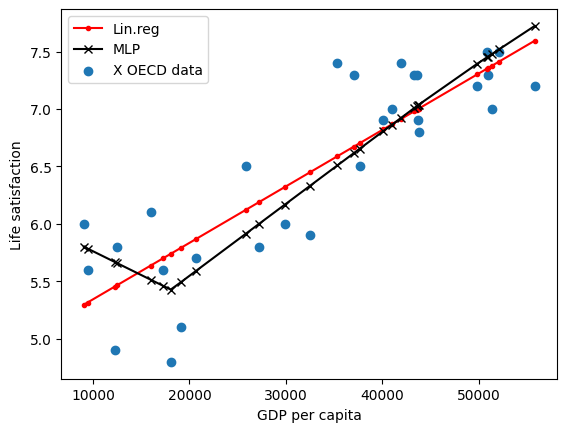

In [11]:
from sklearn.preprocessing import StandardScaler
scaledMLPPipe = Pipeline (
  [
    ('scaler', StandardScaler()),
    ('mlp', mlp)
  ]
)

scaledLinRegPipe = Pipeline (
  [
    ('scaler', StandardScaler()),
    ('linreg', linreg)
  ]
)

scaledMLPPipe.fit(X,y)
scaledLinRegPipe.fit(X,y)

PlotModels(scaledLinRegPipe, scaledMLPPipe, X, y, "Lin.reg", "MLP")
plt.show()

#### Sources

https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#standardscaler


## Qd) Modify the MLP Hyperparameters

Attempt 1: 1 and 10000 hidden layer sizes: With a single hidden layer and a single neuron, it guesses the mean, which isnt too surprising. With 10000 neurons in 1 layer, it overfits and fits the data using a parabola, which is very wrong.

![1 vs 10000 neurons comparison](figs/1and10k.png)

Attempt 2: 5 and 5, relu and tanh: The tanh is slightly curved and the relu is just straight. The scores are similar.

![5 neurons with different activations](figs/5and5.png)

Attempt 3: 10 and 10, adam and sgd: The adam solver has a hockey stick like shape and a slightly better score.

![Adam vs SGD solver comparison](figs/10adamandsgd.png)

In general its very difficult to manually find the best hyperparameters, and we therefore rely on machines to try many different combination and then we can decide.


Prediction(MLP_10_adam) for GDP=22587: [5.69]
Prediction(MLP_10_sgd) for GDP=22587: [5.84]
R^2(MLP_10_adam) score: 0.7929225217321123
R^2(MLP_10_sgd) score: 0.7596565612125388
 MLP_10_sgd.score(X, y)=0.76
MLP_10_adam.score(X, y)=0.79


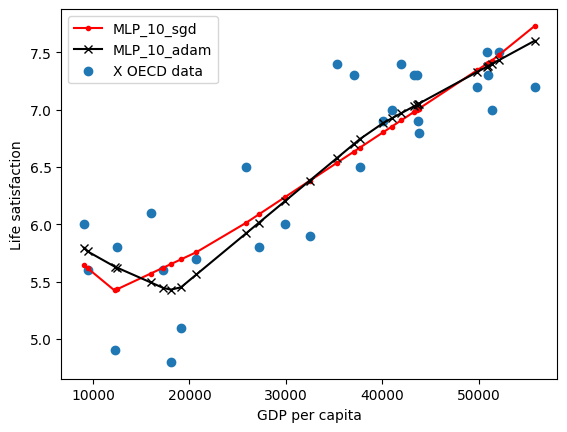

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

mlp_10_adam = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(10,),
        solver='adam',
        activation='relu',
        tol=1E-5,
        max_iter=100000,
        verbose=False
    ))
])

mlp_10_sgd = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(10,),
        solver='sgd',
        activation='relu',
        tol=1E-5,
        max_iter=100000,
        verbose=False
    ))
])

# Fit model
mlp_10_adam.fit(X, y)
mlp_10_sgd.fit(X, y)

y_pred_100 = mlp_10_adam.predict(X)
y_pred_10 = mlp_10_sgd.predict(X)

# Example prediction for Cyprus
x_new = [[22587]]
print("Prediction(MLP_10_adam) for GDP=22587:", mlp_10_adam.predict(x_new))
print("Prediction(MLP_10_sgd) for GDP=22587:", mlp_10_sgd.predict(x_new))

# Score
print("R^2(MLP_10_adam) score:", mlp_10_adam.score(X, y))
print("R^2(MLP_10_sgd) score:", mlp_10_sgd.score(X, y))

PlotModels(mlp_10_sgd, mlp_10_adam, X, y, "MLP_10_sgd", "MLP_10_adam")
plt.show()

# L5: Train linear regression


In [13]:

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import add_dummy_feature
import numpy as np

class MyLinReg(BaseEstimator, RegressorMixin):
    def __init__(self: 'MyLinReg', eta0=0.01, max_iter=10000, tol=1e-4, n_iter_no_change=10, verbose=True):
        self.eta0: float = eta0
        self.max_iter: int = max_iter
        self.tol: float = tol
        self.n_iter_no_change: int = n_iter_no_change
        self.verbose: bool = verbose
        self.intercept_: float = 0.0 # dummy init value
        self.coef_: np.ndarray = np.array([0.0]) # dummy init value

    def _MSE(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        assert len(y_pred) == len(y_true) and y_pred.ndim == 1 and y_true.ndim == 1
        err_vec = y_pred - y_true # Xw - y
        return np.mean(err_vec ** 2)

    # loss function isnt used. But could be used in terms of early stopping.
    def _loss(self: 'MyLinReg', X, y) -> float:
        y_pred = self.predict(X)
        return self._MSE(y_pred, y)

    def __str__(self: 'MyLinReg') -> str: 
        return "MyLinReg.__str__(): hi!"

    def fit(self: 'MyLinReg', X: np.ndarray, y: np.ndarray) -> None:        
        # Run batch or stocastich
        self._batch(X, y)
        #self._sgd(X, y)
        return self

    def predict(self: 'MyLinReg', X: np.ndarray) -> np.ndarray:
        return X @ self.coef_ + self.intercept_
    
    def _batch(self: 'MyLinReg', X: np.ndarray, y: np.ndarray):
        # Add bias term
        X_b = add_dummy_feature(X)

        n_samples, n_features = X_b.shape
        np.random.seed(42)
        theta = np.random.randn(n_features, 1) # random initialization of parameters

        for epoch in range(self.max_iter):
            # Compute predictions: X w
            y_pred = X_b @ theta

            # Compute gradient: (2/n) X_b^T (y_pred - y)
            gradient = (2.0 / n_samples) * X_b.T @ (y_pred - y.reshape(-1, 1))
            
            # Update theta
            theta -= self.eta0 * gradient
        
        # Store final parameters
        self.intercept_ = float(theta.ravel()[0])
        self.coef_ = theta[1:].ravel()
                
    # its kinda funny how "unpredictable" SGD is. You can really finetune with all the hyperparameters(and you have to)
    def _sgd(self: 'MyLinReg', X: np.ndarray, y: np.ndarray):
        # Add bias term
        X_b = add_dummy_feature(X)

        n_samples, n_features = X_b.shape
        np.random.seed(42)
        theta = np.random.randn(n_features, 1) # random initialization of parameters

        for epoch in range(self.max_iter):
            # Shuffle data, this means there is no "tilbagelægning" during an epoch
            indices = np.random.permutation(n_samples)
            # This part is almost identical to HOML, but without the learning schedule(variable eta)
            for i in indices:
                xi = X_b[i:i+1]
                yi = y[i:i+1]

                # Prediction
                y_pred_i = xi @ theta

                # Compute gradient: 2 X_b^T (y_pred - y)
                gradient = 2.0 * xi.T @ (y_pred_i - yi.reshape(-1, 1))

                # Update theta
                theta -= self.eta0 * gradient

        # Store final parameters
        self.intercept_ = float(theta.ravel()[0])
        self.coef_ = theta[1:].ravel()
        
    #def score(self, X, y_true): # inherited from RegressorMixin
        #assert False, "TODO: implement me, or inherit me"

$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands v01, remember: no newlines in defs}
    \rem{MACRO eq: equation <#1:lhs> <#2:rhs>}
    \def\eq#1#2{#1 &=& #2\\}
    \rem{MACRO arr: array <#1:columns (lcr..)> <#2:content>}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \rem{MACRO ac: array column vector <#1:columns (lcr..)> <#2:content>}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \rem{MACRO st: subscript text <#1:content>}
    \def\st#1{_{\textrm{#1}}}
    \rem{MACRO norm: norm caligari L <#1:content>}
    \def\norm#1{{\cal L}_{#1}}
    \rem{MACRO obs: ??}
    \def\obs#1#2{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \rem{MACRO diff: math differetial operator <#1:content>}
    \def\diff#1{\mathrm{d}#1} 
    \rem{MACRO half: shorthand for 1/2}
    \def\half{\frac{1}{2}}
    \rem{MACRO pfrac: partial fraction <#1:numenator> <#2:denumenator>}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \rem{MACRO dfrac: differetial operator fraction <#1:numenator> <#2:denumenator>}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    \rem{MACRO pown: power and parantesis (train/test..) <#1:content>}
    \def\pown#1{^{(#1)}}
    \rem{MACROS powi, pown: shorthands for power (i) and (n)}
    \def\powni{\pown{i}}
    \def\pownn{\pown{n}}
    \rem{MACROS powtest, powertrain: power (test) and (train)}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \rem{MACRO boldmatrix: bold matix/vector notation} 
    \def\boldmatrix#1{\mathbf{#1}} 
    \rem{MACROS X,Z,x,y,w: bold X,Z,x etc.} 
    \def\bX{\boldmatrix{X}}
    \def\bZ{\boldmatrix{Z}}
    \def\bx{\boldmatrix{x}}
    \def\by{\boldmatrix{y}}
    \def\bw{\boldmatrix{w}}
    \def\bz{\boldmatrix{z}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \rem{MACROS stpred, sttrue: shorthand for subscript 'pred' and 'true'}
    \def\stpred{\st{pred}~}
    \def\sttrue{\st{true}~}
    \rem{MACROS ypred, ytrue:   shorthand for scalar y 'pred' and 'true'}
    \def\ytrue{y\sttrue}
    \def\ypred{y\stpred} 
    \rem{MACROS bypred, bytrue: shorthand for vecor y 'pred' and 'true'} 
    \def\bypred{\boldmatrix{y}\stpred}
    \def\bytrue{\boldmatrix{y}\sttrue}
$$
### Qa: Concepts and Implementations MUSTS

#### Epoch vs iteration

One epoch of training is when the entire training set has been iterated. 

An iteration is an update on the weights.

BGD: In our Batch Gradient Descent, epoch and iteration is essentially the same thing, since we update the weights after each pass on the training set.

SGD: In our Batch Gradient Descent, each random access into the training set results in an iteration. In our training set, we shuffle and each sample, is only used once. This results in x iterations per epoch, where x is the number of samples in the training set.

<href> https://medium.com/@sujathamudadla1213/epoch-vs-batch-vs-iteration-in-neural-networks-8d02ea155304

#### Numerical vs closed form

The numerical is the "engineer way" of doing things, with many iterations, you try to minimize a loss function. It may not find the optimal solution because of local and global optimums.

The closed form it the "math way" of doing it. You solve the system using a lot of algebra and find a solution that in a single step will find the optimal weights. It may be very hard to find the closed form. It may also have requirements/assumptions for the sets, like the fact that a matrix must be invertible:

$$
  \bw^* ~=~ \left( \bX^\top \bX \right)^{-1}~ \bX^\top \bytrue
$$

### Qc: Testing and Test Data

For this we have chosen to stick with the IRIS smoke tester. Here are the results for the IRIS dataset:

Batch:

INFO:  SCORE['MyLinReg'] = 0.891

INFO:  SCORE['SGDRegressor'] = 0.913

SGD:

INFO:  SCORE['MyLinReg'] = 0.945

INFO:  SCORE['SGDRegressor'] = 0.913

It seems that the linear regressor actually does a decent job.

The MNIST dataset is just way too large to compute without variable learning rate, so skip that if running this notebook...

### Qd: The Journaling of Your Regressor 

Note that this implementation uses type hints(variable: type). This allows for better IDE support.

#### Constructor

The linear regressor has a default constructor that takes optional parameters. Each of these is saved as member variables in the instantiated object.

#### MSE and loss function

The MSE and loss function are implemented as private functions. The MSE is based on the formula:

$$
\ar{rl}{
    \textrm{MSE}(\bX,\bytrue;\bw)  &= \frac{1}{n} \sum_{i=1}^{n} L\powni \\
                                   &= \frac{1}{n} \sum_{i=1}^{n} \left( \bw^\top\bx\powni - y\powni\sttrue \right)^2\\
                                   &= \frac{1}{n} ||\bX \bw - \bytrue||_2^2
}
$$

The implementation of MSE is seen here:

```python
    def _MSE(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        assert len(y_pred) == len(y_true) and y_pred.ndim == 1 and y_true.ndim == 1
        err_vec = y_pred - y_true # Xw - y
        return np.mean(err_vec ** 2)
```

The loss function(though not used), calculates the predicted values based on theta, and then calls the MSE function.

$$
\ar{rl}{
   J &= \frac{1}{2} ||\bX \bw - \bytrue||_2^2\\
     &  \propto \textrm{MSE}
}
$$

If we were to use the loss function, it could be in terms of early stopping. If we found that several iterations gave no significant progress to the loss function, meaning it was platueing(perhaps its at a minimum), then we might as well stop iterating.

#### Fit

The fit method forwards the input to either the _batch or _sgd functions.

The start of both methods adds the bias, using the add_dummy_feature(X) from sk_learn:

$$
\ar{rl}{
  \ac{c}{1\\\bx\powni} & \mapsto \bx\powni\\
}
$$

After that we instantiate a theta, being our weights(w). These are set to random values to avoid a stagnating model.

Batch

During our batch gradient descent, each iteration equals an epoch, which means we use the entire training set when updating weights. This is shown in the following equation:

$$
\ar{rl}{
  \nabla_\bw J &= \frac{2}{n} \bX^\top \left( \bX \bw - \bytrue \right)
}
$$

Seen here in the code:

```python

gradient = (2.0 / n_samples) * X_b.T @ (y_pred - y.reshape(-1, 1))

```

SGD

In each epoch, the stochastic gradient descent shuffles the entire training set. Then it iterates over it and plucks one out and performs an update on the weights. When the entire training set has been exhausted, a new epoch is started.

$$
\ar{rl}{
  \nabla_\bw J &= 2 \left(\mathbf{x}^{(i)}\right)^\top \left( \mathbf{x}^{(i)} \bw - \mathbf{y}^{(i)}_{\textrm{true}} \right)
}
$$

Seen here in the code:

```python

gradient = 2.0 * xi.T @ (y_pred_i - yi.reshape(-1, 1))

```

#### Predict

The predict function simply multiplies the stored coefficients to the input and adds the stored bias/intercept.
This is the same for the Batch and Stocastich implementation.


In [14]:
# Mini smoke test for your linear regressor: TestMyLinReg

import sys
import numpy

### SOME NIFTY HELPER FUNS ###

def isVector(y, expected_n=-1):
    assert isinstance(y, numpy.ndarray), f"expected type 'numpy.array' but got {type(y)}"
    assert y.ndim==1, f"expected y.ndim==1 but got {y.ndim}"
    assert expected_n<0 or expected_n==y.shape[0], f"expected vector of size {expected_n} but got size {y.shape}"
    return True

def isMatrix(X, expected_m=-1, expected_n=-1):
    assert isinstance(X, numpy.ndarray), f"expected type 'numpy.array' but got {type(X)}"
    assert X.ndim==2, f"expected X.ndim==2 but got {X.ndim}"
    assert expected_m<0 or expected_m==y.shape[0], f"expected matrix of size {expected_m}x{expected_n} but got size {X.shape}"
    assert expected_n<0 or expected_n==y.shape[1], f"expected vector of size {expected_m}x{expected_n} but got size {X.shape}"
    return True

def PrintMatrix(x, label="", precision=12, linewidth=60):
    hasFancy = False
    try:
        # NOTE: how does multiple import behave, any performance issues?
        from libitmal.utils import PrintMatrix as FancyPrintMatrix
        hasFancy = True
    except Exception as ex:
        Warn("could not import PrintMatrix from libitmal.utils, defaulting to simple function..")

    if hasFancy:
        FancyPrintMatrix(x, label=label, precision=precision, linewidth=linewidth)
    else:
        # default simple implementation
        print(f"{label}{' ' if len(label)>0 else ''}{x}")

def Col(color):
    hasFancy = False
    try:
        from libitmal.Utils.colors import Col as FancyCol
        hasFancy = True
    except Exception as ex:
        Warn("could not import Col from libitmal.Utils.colors, defaulting to simple function..")

    if hasFancy:
        return FancyCol(color)
    else:
        return ""

def ColEnd():
    hasFancy = False
    try:
        from libitmal.Utils.colors import ColEnd as FancyColEnd
        hasFancy = True
    except Exception as ex:
        Warn("could not import Col from libitmal.Utils.colors, defaulting to simple function..")

    if hasFancy:
        return FancyColEnd()
    else:
        return ""

def PrintOutput(msg, pre_msg, ex=None, color="", filestream=sys.stdout):

    def FormatTxt(txt, linewidth=60, prefix="", replacetabs=True):
        assert isinstance(txt, str)
        assert isinstance(linewidth, int) and linewidth > 0
        assert isinstance(prefix, str)

        if replacetabs:
            txt = txt.replace("\t","    ")

        r = ""
        n = 0
        m = 0
        for i in txt:
            m += 1
            if n >= linewidth:
                if not i.isspace() and m < len(txt) and not txt[m].isspace():
                    r += "\\" # add hypen
                r += "\n" + prefix
                n = 0

            if n == 0 and i.isspace():
                continue # skip leading space

            r += i
            n += 1

            if i == "\n":
                r += prefix
                n = 0

        return r

    col_beg = Col(color)
    col_end = ColEnd()

    prefix = "".ljust(len(pre_msg)) 
    msg = FormatTxt(msg, prefix=prefix)
    
    print(f"{col_beg}{pre_msg}{msg}{col_end}\n", file=filestream)

    if ex is not None:
        #msg += f"\n   EXCEPTION: {ex} ({type(ex)})"
        PrintOutput(str(ex), prefix + "EXCEPTION: ", None, "red", filestream)

def Warn(msg, ex=None):
    PrintOutput(msg, "WARN:  ", ex, "lyellow")

def Err(msg, ex=None):
    PrintOutput(msg, "ERROR: ", ex, "lred" )
    raise Exception(msg) if ex is None else ex

def Info(msg):
    PrintOutput(msg, "INFO:  ", None, "lpurple")

def SimpleAssertInRange(x, expected, eps):
    #assert isinstance(x, numpy.ndarray)
    #assert isinstance(expected, numpy.ndarray)
    #assert x.ndim==1 and expected.ndim==1
    #assert x.shape==expected.shape
    assert eps>0
    assert numpy.allclose(x, expected, eps) # should rtol or atol be set to eps?

def GenerateData():
    X = numpy.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
    y = numpy.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    return X, y

def TestMyLinReg():
    X, y = GenerateData()

    try:
        # assume that your regressor class is named 'MyLinReg', please update/change
        regressor = MyLinReg()
    except Exception as ex:
        Err("your regressor has another name, than 'MyLinReg', please change the name in this smoke test", ex)

    try:
        regressor = MyLinReg(max_iter=200)
    except Exception as ex:
        Err("your regressor can not be constructed via the __init_ for parameter 'max_iter'", ex)
    try:
        regressor = MyLinReg(eta0=0.01)
    except Exception as ex:
        Err("your regressor can not be constructed via the __init_ for parameter 'eta0'", ex)
    try:
        regressor = MyLinReg(verbose=False)
    except Exception as ex:
        Warn("your regressor can not be constructed via the __init_ for parameter 'verbose'", ex)
    try:
        regressor = MyLinReg(tol=1e-3)
    except Exception as ex:
        Warn("your regressor can not be constructed via the __init_ for parameter 'tol'", ex)
    try:
        regressor = MyLinReg(n_iter_no_change=1e-3)
    except Exception as ex:
        Warn("your regressor can not be constructed via the __init_ for parameter 'n_iter_no_change'", ex)

    # create regressor with default hyperparameter values
    # to be used for training, prediction and score..
    try:
        regressor = MyLinReg()
    except Exception as ex:
        Err("your regressor can not be constructed via the __init_ with default parameters", ex)


    try:
        regressor.fit(X, y)
    except Exception as ex:
        Err("your regressor can not fit", ex)

    try:
        y_pred = regressor.predict(X)
        Info(f"y_pred = {y_pred}")
    except Exception as ex:
        Err("your regressor can not predict", ex)


    try:
        score  = regressor.score(X, y)
        Info(f"SCORE = {Col('lblue')}{score}{ColEnd()}")
    except Exception as ex:
        Err("your regressor fails in the score call", ex)


    try:
        w    = None # default
        bias = None # default
        try:
            w = regressor.coef_
            bias = regressor.intercept_
        except Exception as ex:
            w = None
            Warn("your regressor has no coef_/intercept_ atrributes, trying Weights() instead..", ex)
        try:
            if w is None:
                w = regressor.Weights() # maybe a Weigths function is avalible on you model?
                try:
                    assert w.ndim == 1,     "can only handle vector like w's for now"
                    assert w.shape[0] >= 2, "expected length of to be at least 2, that is one bias one coefficient"
                    bias = w[0]
                    w = w[1:]
                except Exception as ex:
                    w = None
                    Err("having a hard time concantenating our bias and coefficients, giving up!", ex)
        except Exception as ex:
            w = None
            Err("your regressor also has no Weights() function, giving up!", ex)
        Info(f"bias         = {bias}")
        Info(f"coefficients = {w}")
    except Exception as ex:
        Err("your regressor fails during extraction of bias and weights (but is a COULD)", ex)

    try:
        from libitmal.utils import PrintMatrix
    except Exception as ex:
        PrintMatrix = SimplePrintMatrix # fall-back
        Warn("could not import PrintMatrix from libitmal.utils, defaulting to simple function..")

    try:
        from libitmal.utils import AssertInRange
    except Exception as ex:
        AssertInRange = SimpleAssertInRange # fall-back
        Warn("could not import AssertInRange from libitmal.utils, defaulting to simple function..")

    try:
        if w is not None:
            if bias is not None:
                w = numpy.concatenate(([bias], w)) # re-concat bias an coefficients, may be incorrect for your implementation!
            
            # TEST VECTOR:
            w_expected = numpy.array([4.046879011698, 1.880121487278])
            
            PrintMatrix(w,          label="       w         =")
            PrintMatrix(w_expected, label="       w_expected=")
            print()
            
            eps = 1E-2 # somewhat big epsilon, allowing some slack..
            AssertInRange(w, w_expected, eps)
            Info("Well, good news, your w and the expected w-vector seem to be very close numerically, so the smoke-test has passed!")
            
            return regressor
        else:
            Warn("cannot test due to missing w information")
    except Exception as ex:
        Err("mini-smoketest on your regressor failed", ex)
    
    return None

Warn("This mini smoke-test may produce false-positives and/or\n false-negatives..")
TestMyLinReg()

print("OK")

WARN:  This mini smoke-test may produce false-positives and/or
       false-negatives..

INFO:  y_pred = [5.61 6.76 4.05 5.18]

INFO:  SCORE = 0.4950056429557478

INFO:  bias         = 4.046879011698211

INFO:  coefficients = [1.88]

       w         =[4.05 1.88]
       w_expected=[4.05 1.88]

INFO:  Well, good news, your w and the expected w-vector seem to be
       very close numerically, so the smoke-test has passed!

OK


# L6: ANN


In [15]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    # y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
# removing plots for simplicity during handin
# plt.plot(X, y_true, "r-.")
# plt.legend(["y_true"])
# plt.xlabel("X")
# plt.ylabel("y")
# plt.title("ANN, Groundtruth data simple")
           
print("OK")

2025-10-10 09:58:32.678952: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-10 09:58:33.034551: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-10 09:58:34.626515: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


OK


#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients

In [16]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True,
                   random_state=42)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

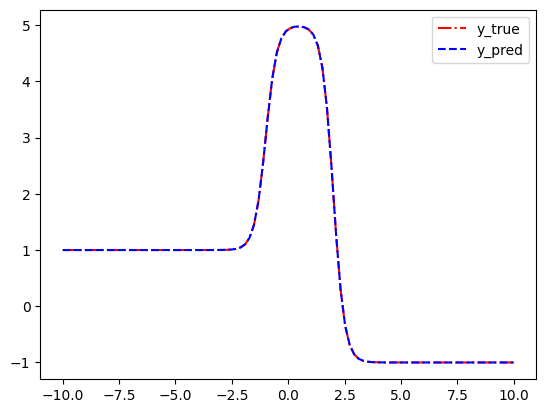

In [17]:
plt.plot(X, y_true, "r-.")
plt.plot(X, y_pred, "b--")
plt.legend(["y_true", "y_pred"])
plt.show()

In [18]:
print("Weights:\t", mlp.coefs_)
print("intercepts:\t", mlp.intercepts_)

Weights:	 [array([[-1.99,  2.  ]]), array([[-2.],
       [-3.]])]
intercepts:	 [array([-1.99, -4.  ]), array([-0.])]


#### Qb)

Draw the ANN with its input-, hidden- and output-layer. The bias are the values drawn in the nodes.

Note: The random states should be set, but something gibberish might still happen, when the code is re-run and change the weights and biases

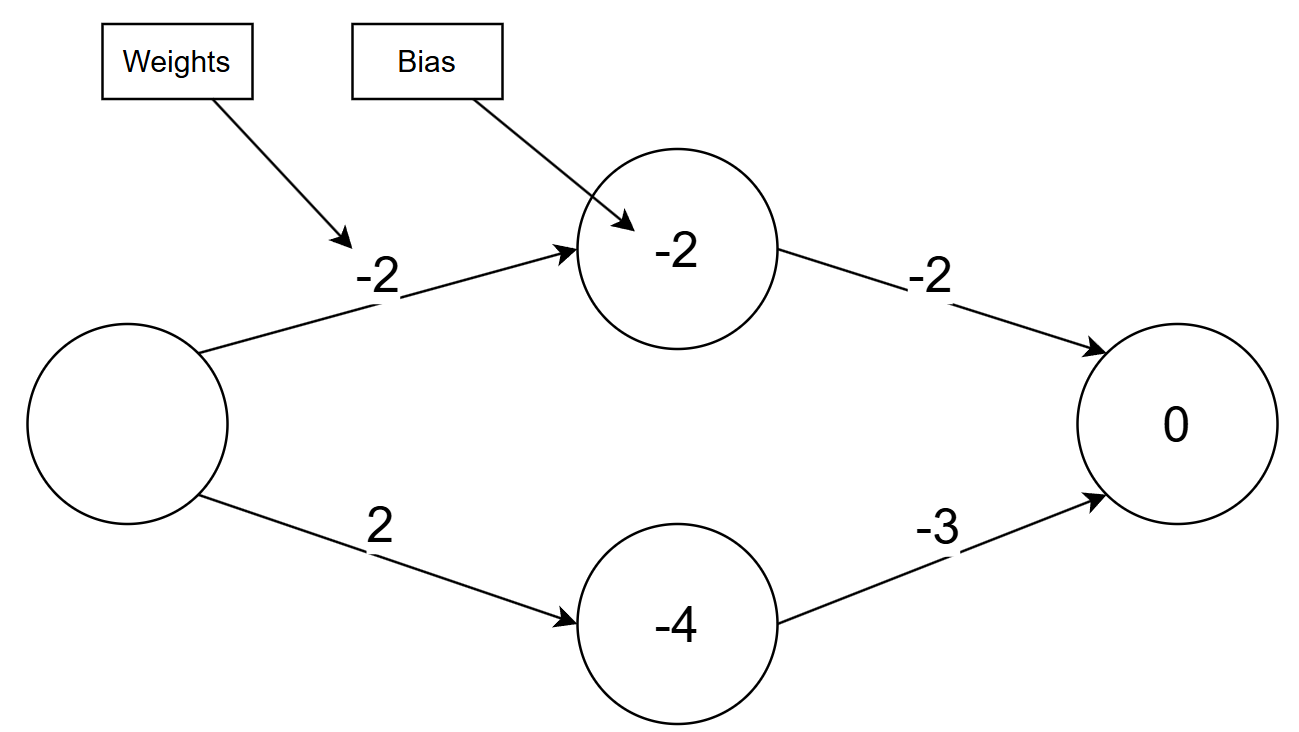

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

The 4 coefficient (weights) and 3 the biases (intercepts) are added into the formula

In [19]:
y_math = -2.001 * np.tanh(-1.994 * X -1.993) - 3.001 * np.tanh(1.998 * X -3.995) + 0

#### Qd)

The y_math function is plotted and compared to the true values and the MLP predicted values.

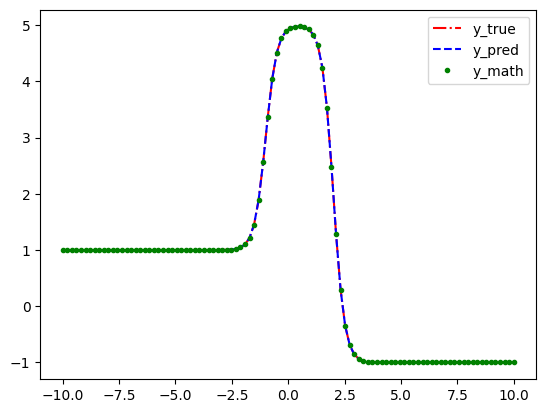

In [20]:
plt.plot(X, y_true, "r-.")
plt.plot(X, y_pred, "b--")
plt.plot(X, y_math, "g.")
plt.legend(["y_true", "y_pred", "y_math"])
plt.show()

#### Qe)

Plotting the two halves of the function gives us a very good look into how it predicts.

They are monotonic since they dont have that steep drop, but instead rapidly decrease. 

In our case, one tanh function handles the "up" part and another handles the "down" part. With just two neurons with non-linear activation functions can now solve a "mountain" shaped function. Thats pretty cool.

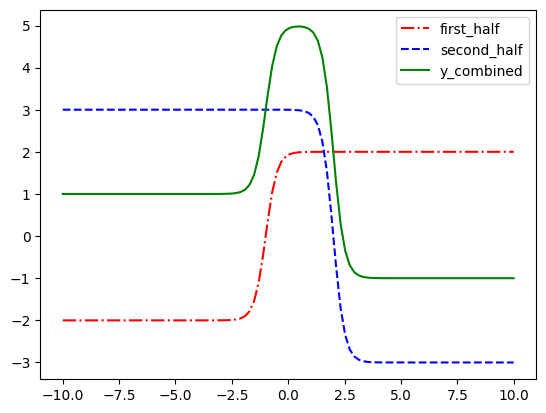

In [21]:
first_half = -2.001 * np.tanh(-1.994 * X -1.993)
second_half = - 3.001 * np.tanh(1.998 * X -3.995)
y_combined = first_half + second_half + 0

plt.plot(X, first_half, "r-.")
plt.plot(X, second_half, "b--")
plt.plot(X, y_combined, "g-")
plt.legend(["first_half", "second_half", "y_combined"])
plt.show()

#### Qf)

We have chosen two hidden layers with 20 neurons in each.

When plotted with the true values, we can see that the MLP is very good at approximating the sinc function.

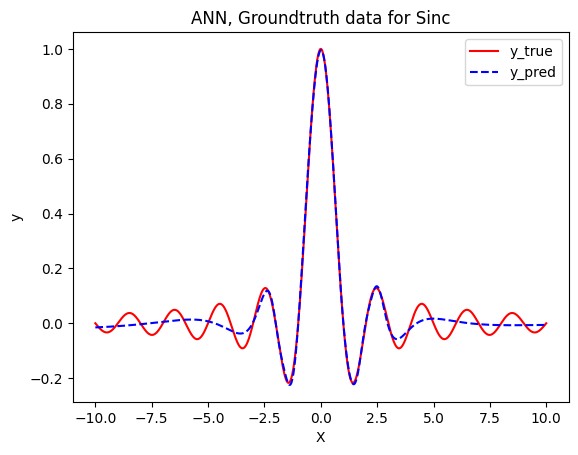

In [22]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-10, 10, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

mlp = MLPRegressor(activation='tanh', 
                   hidden_layer_sizes=[20, 20], 
                   alpha=1e-5, 
                   solver='lbfgs', 
                   max_iter=10000, 
                   verbose=True, 
                   random_state=42)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)
plt.plot(X, y_pred, "b--")
plt.legend(["y_true", "y_pred"])
plt.show()

### Qg

Two implementations where alpha is changed two 1e-1 and 1e5. The if the alpha value is too hight the model is prone to underfitting. This is very visble when the value is set to 10.000 (1e5). 

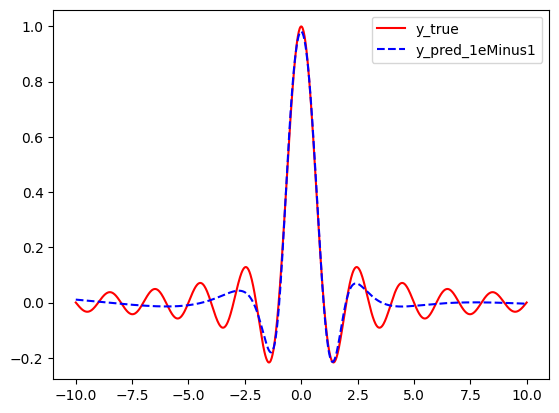

In [23]:
mlp_1eMinus1 = MLPRegressor(activation='tanh',
                        hidden_layer_sizes=[20, 20], 
                        alpha=1e-1, 
                        solver='lbfgs', 
                        max_iter=10000, 
                        verbose=True, 
                        random_state=42) 

mlp_1eMinus1.fit(X, y_true)
y_pred_1eMinus1 = mlp_1eMinus1.predict(X)
plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_1eMinus1, "b--")
plt.legend(["y_true", "y_pred_1eMinus1"])
plt.show()

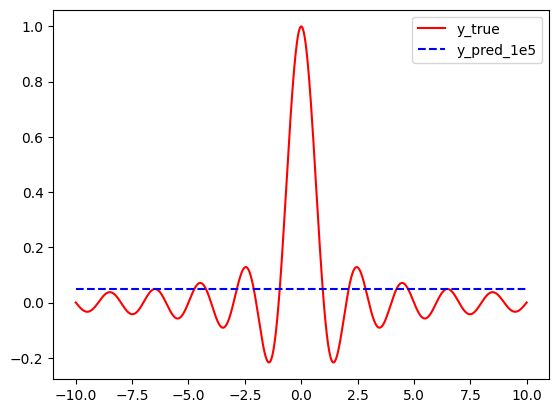

In [24]:
mlp_1e5 = MLPRegressor(activation='tanh',
                        hidden_layer_sizes=[20, 20], 
                        alpha=1e5, 
                        solver='lbfgs', 
                        max_iter=10000, 
                        verbose=True, 
                        random_state=42) 

mlp_1e5.fit(X, y_true)
y_pred_1e5 = mlp_1e5.predict(X)
plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_1e5, "b--")
plt.legend(["y_true", "y_pred_1e5"])
plt.show()

### Keras implementation

A keras implementation closely resembling the MLPRegressor. Visually it almost matches the Regressor and seems to achieve about the same precision

/home/ei/uni/6_semester/mal/mal_grp30/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-10 09:58:36.908538: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │        20,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,461 (87.74 KB)

 Trainable params: 22,461 (87.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0773 - mae: 0.1952   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - mae: 0.1026 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0245 - mae: 0.0925 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 - mae: 0.0869 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 - mae: 0.0822 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 - mae: 0.0771 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0107 - mae: 0.0716 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - mae: 0.0663 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0615 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - mae: 0.0576 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - mae: 0.0544 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - mae: 0.0519 
Epoch 13/100
32/32 ━━━━

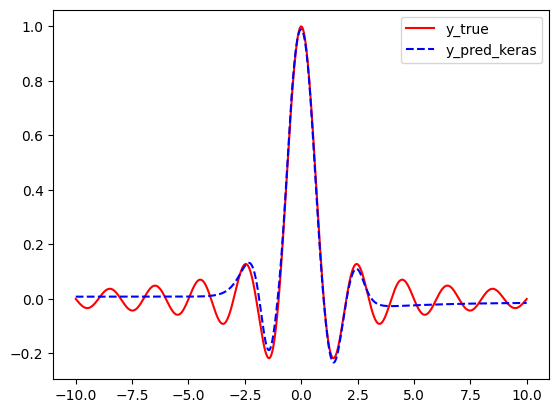

In [25]:
keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])

keras_model.summary()

keras_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
keras_model.fit(X, y_true, epochs=100, verbose=1)
y_pred_keras = keras_model.predict(X)
plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_keras, "b--")
plt.legend(["y_true", "y_pred_keras"])
plt.show()